In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

df = pd.read_csv("Housing.csv")

df.head(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


R2 Score: 0.6716416442249531


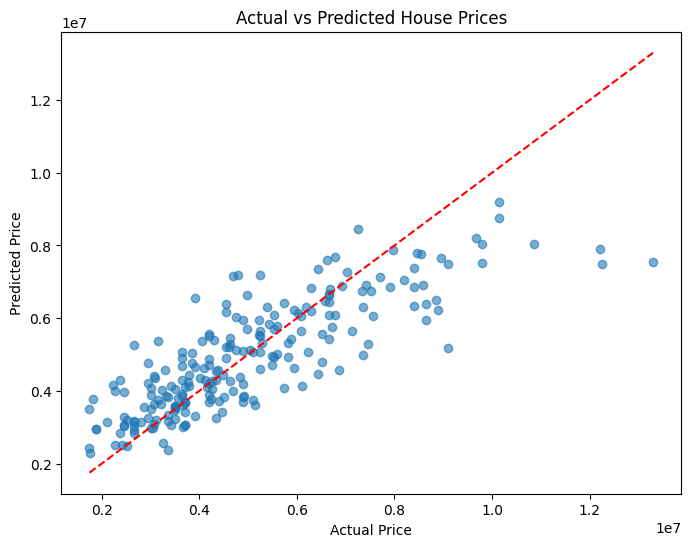

In [3]:
binary_cols = [
    'mainroad','guestroom','basement',
    'hotwaterheating','airconditioning','prefarea'
]

for col in binary_cols:
    df[col] = df[col].map({'yes':1, 'no':0})


X = df[['area','bedrooms','bathrooms','stories','parking',
        'mainroad','guestroom','basement',
        'hotwaterheating','airconditioning','prefarea']]

y = df['price']


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=42
)

model = LinearRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


print("R2 Score:", r2_score(y_test, y_pred))




plt.figure(figsize=(8,6))

plt.scatter(y_test, y_pred, alpha=0.6)


plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    'r--'
)

plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted House Prices")
plt.show()
